<h1><center>Credit Card Fraud Detection: Model Building</center></h1>

V - <b>Building Model.</b>  
    Step 1: Test accuracy of classifiers.  
    Step 2: Fine tune model.   
    Step 3: Cross-Validation to ensure correct accuracy.    
    Step 4: Confusion matrix and f1_score: Sensitivity and Specificity to ensure good classification.  
    
    
VI - <b>Testing Model.</b>  
    a) test best models with the final test.
<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df =  pd.read_csv('/Users/lucas/Desktop/DS_project/credit_fraud/creditcard.csv')


In [3]:
from sklearn.model_selection import train_test_split
data, df_final_test = train_test_split(df, test_size=0.2, random_state=42)



In [4]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)
#data = data.drop(columns=[ 'V1','V2','V3','V4','V5', 'V6', 'V7', 'V9', 'V8', 'V11', 'V13', 'V15','V16','V17', 'V18','V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount', 'scaled_time'])

In [5]:
from sklearn.model_selection import StratifiedKFold,StratifiedShuffleSplit

X = data.drop('Class', axis=1)
y = data['Class']

strat_fold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in strat_fold.split(X, y):
    X_train1, X_test1 = X.iloc[train_index], X.iloc[test_index]
    y_train1, y_test1 = y.iloc[train_index], y.iloc[test_index]


X_train1 = X_train1.values
X_test1 = X_test1.values
y_train1 = y_train1.values
y_test1 = y_test1.values

In [6]:

data = data.sample(frac=1)


fraud = data.loc[data['Class'] == 1]
non_fraud = data.loc[data['Class'] == 0][:492]

undersampling = pd.concat([fraud, non_fraud])

#Shuffling
undersampled_data = undersampling.sample(frac=1, random_state=42)


print("After undersampling '1': {}".format(sum(undersampled_data['Class'] == 1))) 
print("After undersampling '0': {}".format(sum(undersampled_data['Class'] == 0))) 


undersampled_data.head()

After undersampling '1': 394
After undersampling '0': 492


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
79874,-0.443794,1.271395,1.206178,0.790371,0.418935,-0.848376,0.917691,-0.235511,-0.285692,-0.867900,...,0.513479,-0.264243,0.443311,0.029516,-0.335141,-0.188815,-0.123391,1,-0.236503,-0.311120
42674,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,-11.589748,...,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,1,-0.286434,-0.511052
75782,-1.463844,-0.510111,-0.062757,-0.706234,3.372528,2.985592,-0.610443,0.959950,0.055950,-0.136052,...,-0.602770,-0.263765,1.060186,-0.024294,0.229640,0.363616,0.136988,0,0.303077,-0.334257
92141,0.981494,-0.279734,1.345676,1.346112,-1.192771,-0.254369,-0.610938,0.075502,0.630997,-0.047568,...,0.738587,-0.148079,0.410125,0.329201,-0.248784,0.058031,0.059799,0,1.090909,-0.245549
151733,2.074745,-0.206464,-1.191342,0.352686,0.086926,-0.481002,-0.174423,-0.228842,2.528197,-0.557320,...,0.231895,0.064310,0.559593,0.202407,0.134446,-0.062205,-0.065141,0,-0.239161,0.134302


In [7]:
#Remov bad columns !
#Remove outlier !
def remove_outlier(df, column, th):
    fraud = df[column].loc[df['Class'] == 1].values
    q1, q3 = np.percentile(fraud, 25), np.percentile(fraud, 75)
    
    IQR = q3 - q1

    IQR_th = IQR * th
    lower, upper = q1 - IQR_th, q3 + IQR_th
    
    print('Lower: {}'.format(lower))
    print('Upper: {}'.format(upper))
    outliers = [x for x in fraud if x < lower or x > upper]
    print('Feature Outliers for Fraud Cases: {}'.format(len(outliers)))
    df = df.drop(df[(df[column] > upper) | (df[column] < lower)].index)
    print('Number of Instances after outliers removal: {}'.format(len(df)))
    print('----' * 30)
    return df,outliers

In [8]:
(undersampled_data,_) = remove_outlier(undersampled_data, 'V10', 1.5)
(undersampled_data,_) = remove_outlier(undersampled_data, 'V12', 1.5)
(undersampled_data,_) = remove_outlier(undersampled_data, 'V14', 1.5)

Lower: -15.504330835864739
Upper: 5.189543666673455
Feature Outliers for Fraud Cases: 13
Number of Instances after outliers removal: 869
------------------------------------------------------------------------------------------------------------------------
Lower: -17.13330341764182
Upper: 5.684141875831379
Feature Outliers for Fraud Cases: 7
Number of Instances after outliers removal: 862
------------------------------------------------------------------------------------------------------------------------
Lower: -18.06850398601943
Upper: 3.9624022548319218
Feature Outliers for Fraud Cases: 0
Number of Instances after outliers removal: 861
------------------------------------------------------------------------------------------------------------------------


<br>


<br>
<h2>V - Model Building.</h2>

In [10]:
# model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import KFold, cross_val_predict,cross_val_score,learning_curve,ShuffleSplit

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [11]:
#fonction qui retourne  l'accuracy de chaque classifier.
def accuracy_classifier(classifiers, X_train, y_train, X_test, y_test):
    plt.style.use('seaborn')
    predictions = {}
    for key, classifier in classifiers.items():
        print(key)
        if(key == "KNearest"):#On va tester plusieurs k et garder le meilleur.
            acc_k = pd.Series([],dtype=pd.StringDtype())
            max_accuracy = 0
            max_k = 0
            for i in range(1, 15):
                
                classifiers[key] = KNeighborsClassifier(n_neighbors=i)
                classifiers[key].fit(X_train, y_train.values)
                
                pred = classifiers[key].predict(X_test)
                k_score = accuracy_score(pred, y_test)
                
                acc_k = acc_k.append(pd.Series(k_score))
                if(max_accuracy < k_score):
                    max_accuracy = k_score
                    max_k = i
                    
            #On affiche
            x=range(0,15)
            plt.plot(range(1,15), acc_k)
            fig=plt.gcf()
            plt.xticks(x)
            fig.set_size_inches(12,6)
            plt.show()
            
            classifiers[key] = KNeighborsClassifier(n_neighbors=max_k)
            predictions[key] = max_accuracy
            print('kNeighbors', max_k)  
            
        else:
            classifier.fit(X_train, y_train.values)
            pred = classifier.predict(X_test)
            predictions[key] = accuracy_score(pred, y_test)   
        print('accuracy:', predictions[key])
        print('-'*20)  
    return(predictions)
        
# Fonction qui retourn l'accuracy par cross validation pour assurer la fiabilité (overfitting).
def cross_val_classifiers(kfold, X, y, classifiers):
    mean_cross_val = {}
    std_cross_val = {}
    
    for key, classifier in classifiers.items():
        cross_scores = cross_val_score(classifier, X, y,scoring='accuracy', cv = kfold)
    
        mean_cross_val[key] = cross_scores.mean()
        std_cross_val[key] = cross_scores.std()
    return(mean_cross_val, std_cross_val)
    
#on regarde la matrix de confusion pour voir la précision de la classification selon les labels.
def confusion_accuracy(classifiers, X, y):
    precisions = {}
    recalls = {}
    f1s = {}
    matrix = {}
    
    index = 0
    for key, classifier in classifiers.items():
        print(key)
        y_predict = cross_val_predict(classifier, X, y.values, cv=3)
        
        precisions[key] = precision_score(y, y_predict)
        recalls[key] = recall_score(y, y_predict)
        f1s[key] = f1_score(y, y_predict)
        matrix[key] = confusion_matrix(y, y_predict)
        
        print('prec score:', precisions[key])
        print('recall score:', recalls[key])
        print('f1 score:', f1s[key])

        sns.heatmap(matrix[key],annot=True,fmt='2.0f')
        plt.show()
        print('-'*20)
        index +=1
    return(precisions, recalls, f1s) 

<br>
<h4><b>step 1: Test accuracy of classifiers</b></h4>

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = undersampled_data.drop('Class', axis=1)
y = undersampled_data['Class']
X_us_train, X_us_test, y_us_train, y_us_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [14]:
classifiers = {
    "RandomForest": RandomForestClassifier(random_state=42, n_estimators=100, max_depth=3),
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=3)
}

RandomForest
accuracy: 0.9132947976878613
--------------------
LogisticRegression
accuracy: 0.9132947976878613
--------------------
KNearest


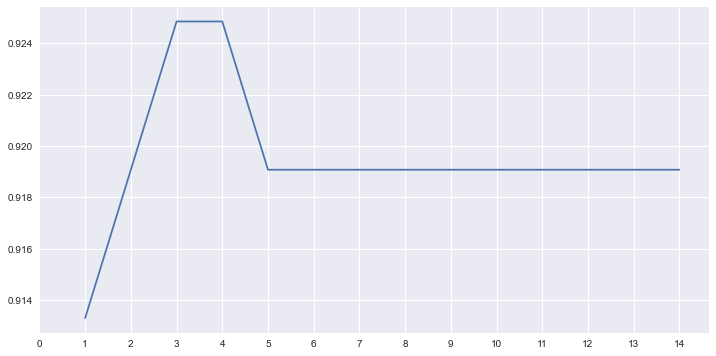

kNeighbors 3
accuracy: 0.9248554913294798
--------------------
Support Vector Classifier
accuracy: 0.9190751445086706
--------------------
DecisionTreeClassifier
accuracy: 0.9017341040462428
--------------------


In [15]:
predictions = accuracy_classifier(classifiers, X_us_train, y_us_train, X_us_test, y_us_test)

<br>
<b>Step 2: tune model</b>

In [16]:
classifiers = {
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
    
}
params_classifiers = {
    "RandomForest": [{'bootstrap':[False,True],'n_estimators':range(50,150,5),'max_depth':[3],
               'max_features':['auto','sqrt','log2']}],
    
    "Support Vector Classifier": [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
    
    "DecisionTreeClassifier": [{'criterion':['gini','entropy'],'splitter':['best', 'random'],'max_depth':[3],
               'max_features':['auto','sqrt','log2']}],
    
    "KNearest": [{'n_neighbors':range(1,8),'weights':['uniform', 'distance'],'metric':['euclidean','manhattan','minkowski'] }],
    "LogisticRegression": [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
    
}



In [17]:
from sklearn.model_selection import GridSearchCV

best_estimators = {}

for key, classifier in classifiers.items():
    grid = GridSearchCV(classifier, params_classifiers[key])

    grid.fit(X_us_train, y_us_train)
    best_estimators[key] = grid.best_estimator_
    print(grid.best_estimator_)

RandomForestClassifier(bootstrap=False, max_depth=3, n_estimators=135)
LogisticRegression(C=0.1)
KNeighborsClassifier(metric='manhattan', n_neighbors=7)
SVC(C=100, gamma=0.001)
DecisionTreeClassifier(max_depth=3, max_features='auto')


<br>
<h4><b> Step 3: cross-validation</b></h4>

- If a model perfoms well on the training data but generalizes poorly according to cross-validations metrics, the model is <b>overfitting</b>.
- If perfoms poorly on both, then it's <b>underfitting</b>.

<br>
Understand <b>learning curves</b>:

- Our model is <b>overfitting</b>, if there is a gap between the training score and cross-validation score. In fact, there is a <b>High Variance</b>.

- Our model is <b> underfitting</b>, if the score is low in both training and cross-validation sets. In fact, there is a <b>High Bias</b>.

In [18]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    sns.set_theme()
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    return plt

<br>
<b> Learning cuvres</b>

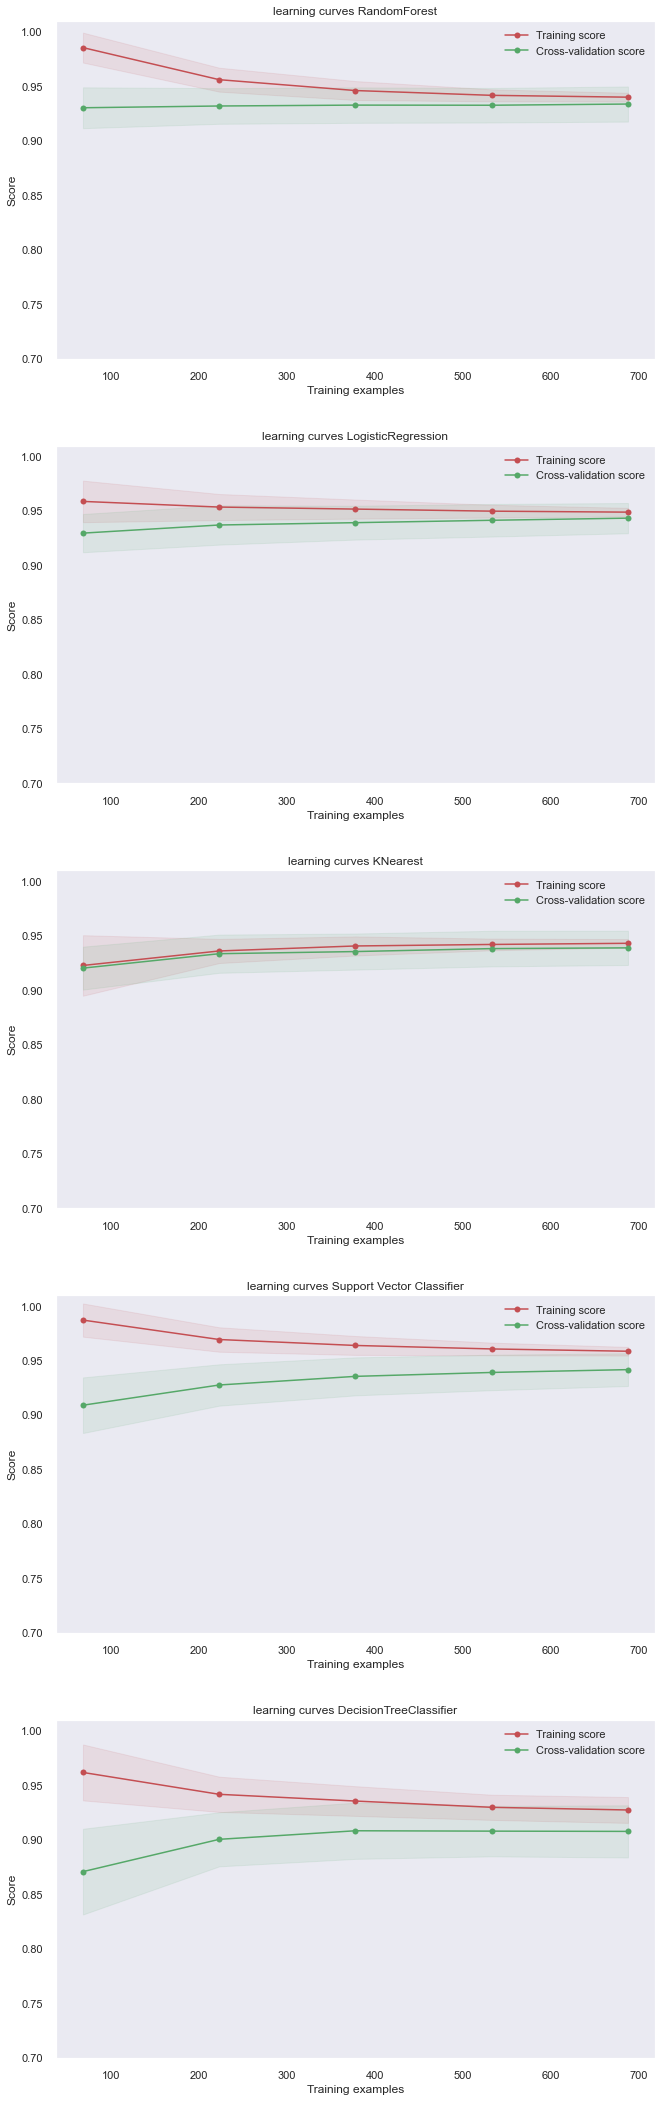

In [19]:

i_ax = 0

sns.set_theme()
fig, axes = plt.subplots(len(classifiers), 1, figsize=(10, 30), squeeze=False)

for key, classifier in best_estimators.items():
    
    title = 'learning curves ' + key
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
    plot_learning_curve(classifier, title, X, y, axes=axes[i_ax], ylim=(0.7, 1.01), cv=cv, n_jobs=4)
    
    i_ax += 1
fig.tight_layout(pad=3.0)




<br>
<b> Cross-validation</b>

Explanation about undersampling durin cross validation 

In [20]:
#Données normal
undersample_X = data.drop('Class', axis=1)
undersample_y = data['Class']

#On  split les données train et test
for train_index, test_index in strat_fold.split(undersample_X, undersample_y):

    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

In [21]:
from imblearn.under_sampling import NearMiss
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

def cross_valid_classifier(key, classifier, undersample_Xtrain,undersample_ytrain, original_Xtrain, original_ytrain):
    undersample_accuracy = []
    undersample_precision = []
    undersample_recall = []
    undersample_f1 = []
    
    for train, test in strat_fold.split(undersample_Xtrain, undersample_ytrain):
        undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), classifier) 
        undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
        undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
        undersample_accuracy.append(undersample_pipeline.score(X_train1[test], y_train1[test]))
        undersample_precision.append(precision_score(y_train1[test], undersample_prediction))
        undersample_recall.append(recall_score(y_train1[test], undersample_prediction))
        undersample_f1.append(f1_score(y_train1[test], undersample_prediction))
        
    return(key, undersample_accuracy, undersample_precision, undersample_recall, undersample_f1)

In [22]:
key_list = []
acc_list = []
prec_list = []
recall_list = []
f1_list = []
for key, classifier in best_estimators.items():
    key, acc, prec,recall, f1 = cross_valid_classifier(key,classifier, undersample_Xtrain,undersample_ytrain, X_train1, y_train1)
    key_list.append(key)
    acc_list.append(np.mean(acc))
    prec_list.append(np.mean(prec))
    recall_list.append(np.mean(recall))
    f1_list.append(np.mean(f1))

cross_validation = pd.DataFrame({'mean_cross_acc':acc_list, 'prec':prec_list, 'recall':recall_list, 'f1':f1_list}, index=key_list)
cross_validation



,mean_cross_acc,prec,recall,f1
RandomForest,0.334300,0.001662,0.639025,0.003316
LogisticRegression,0.817546,0.001788,0.193927,0.003542
KNearest,0.920275,0.002133,0.098249,0.004173
Support Vector Classifier,0.517539,0.001678,0.470592,0.003345
DecisionTreeClassifier,0.461558,0.001558,0.499217,0.003105


<h4><b>Step 4:  Confusion matrix and f1_score: Sensitivity and Specificity to ensure good classification.</b></h4>

RandomForest
prec score: 0.9691119691119691
recall score: 0.8625429553264605
f1 score: 0.9127272727272727


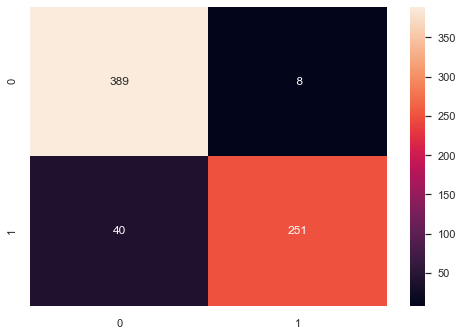

--------------------
LogisticRegression
prec score: 0.9735849056603774
recall score: 0.8865979381443299
f1 score: 0.9280575539568344


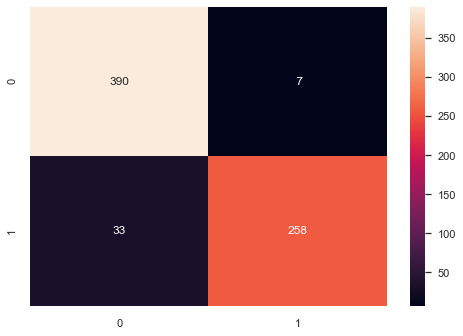

--------------------
KNearest
prec score: 0.9806949806949807
recall score: 0.872852233676976
f1 score: 0.9236363636363637


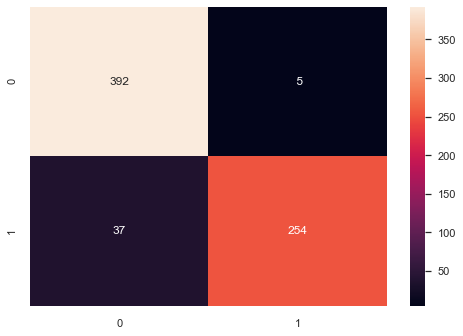

--------------------
Support Vector Classifier
prec score: 0.9589552238805971
recall score: 0.8831615120274914
f1 score: 0.9194991055456171


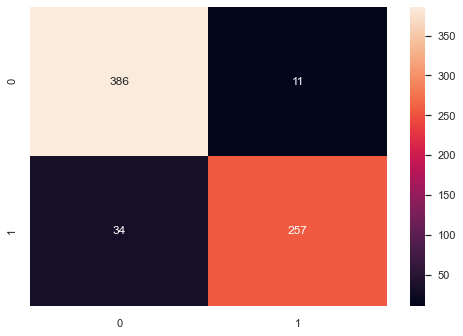

--------------------
DecisionTreeClassifier
prec score: 0.927007299270073
recall score: 0.872852233676976
f1 score: 0.8991150442477877


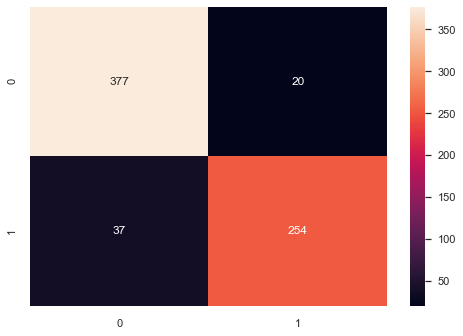

--------------------


In [24]:
conf = confusion_accuracy(best_estimators, X_us_train, y_us_train)

<br>
<h3>VI - Testing Models </h3>

<br>
<b>a) test best models with the final test. </b>

RandomForest
precision:0.15638766519823788
recall:0.8987341772151899
f1:0.26641651031894936
accuracy:0.9914196054335184


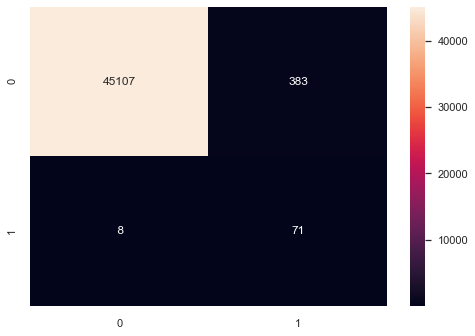

--------------------
LogisticRegression
precision:0.07905982905982906
recall:0.9367088607594937
f1:0.14581280788177337
accuracy:0.9809739077004104


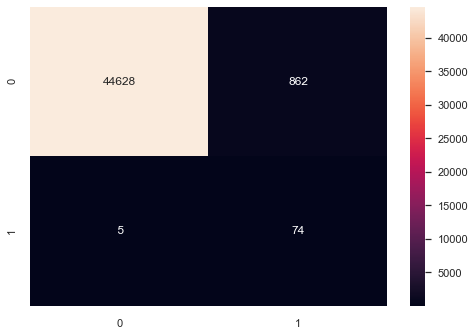

--------------------
KNearest
precision:0.1366223908918406
recall:0.9113924050632911
f1:0.2376237623762376
accuracy:0.9898615286708069


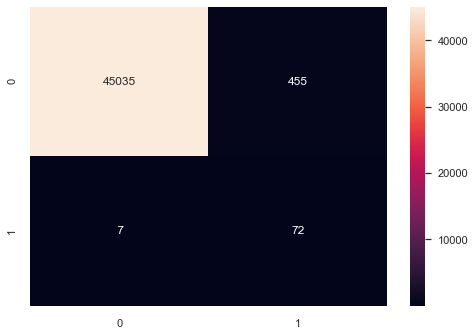

--------------------
Support Vector Classifier
precision:0.08277404921700224
recall:0.9367088607594937
f1:0.15210688591983557
accuracy:0.9818955869121552


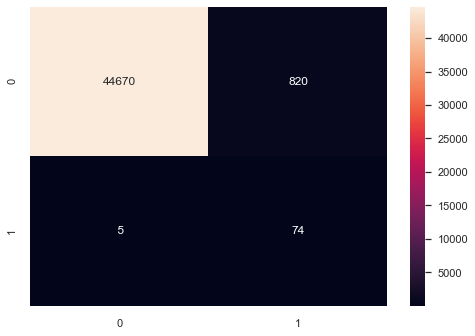

--------------------
DecisionTreeClassifier
precision:0.16901408450704225
recall:0.9113924050632911
f1:0.2851485148514851
accuracy:0.9920779477276218


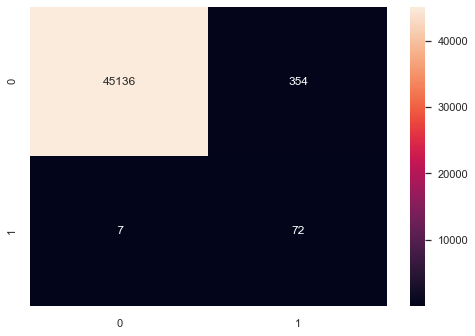

--------------------


In [23]:
X_test = df_final_test.drop('Class', axis=1)
y_test = df_final_test['Class']
from sklearn.metrics import confusion_matrix
for key, classifier in best_estimators.items():
    print(key)
    classifier.fit(X_us_train, y_us_train)
    pred = classifier.predict(X_test1)
    print('precision:{}'.format(precision_score(y_test1,pred)))
    print('recall:{}'.format(recall_score(y_test1,pred)))
    print('f1:{}'.format(f1_score(y_test1,pred)))
    print('accuracy:{}'.format(accuracy_score(pred,y_test1)))
    matrix = confusion_matrix(y_test1, pred)
    sns.heatmap(matrix,annot=True,fmt='2.0f')
       
    plt.show()
    print('-'*20)